### Standart Input and Output

In [7]:
%%writefile generator.py
import sys
import random

n = int(sys.argv[1])
for _ in range(n):
    print(random.random())

Writing generator.py


In [29]:
!python generator.py 5

0.385346215432558
0.2711177187964947
0.9355491627163856
0.06810578802264988
0.04486878092540003


In [13]:
%%writefile addition.py
import sys

print("Input first number")
a = float(input())

print("Input second number")
b = float(input())

c = a + b
print("The sum is", c)

Overwriting addition.py


In [14]:
!python generator.py 2 | python addition.py

Input first number
Input second number
The sum is 1.4517002085773416


In [26]:
%%writefile average.py
import sys

total = 0
n = 0

for line in sys.stdin:
    number = float(line)
    total += number
    n += 1
    
print("average is", total / n)

Overwriting average.py


In [28]:
!python generator.py 1000000 | python average.py

average is 0.5000138547576439


### Standart drawing

[data link](https://introcs.cs.princeton.edu/java/data/)

In [12]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 340
png_renderer.height = 340
pio.renderers.default = "png"

In [13]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('https://introcs.cs.princeton.edu/java/data/usa13509.txt', header=None, delimiter=r"\s+"))

In [14]:
lat = list(df[0])
lon = list(df[1])
lon = [-c for c in lon]    

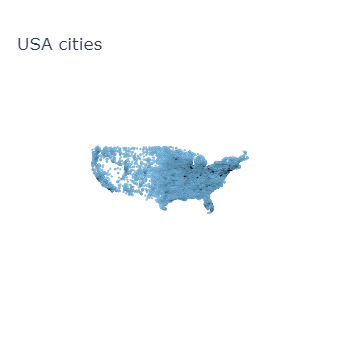

In [20]:
import plotly.graph_objects as go
from plotly.graph_objects import Figure as figure
from plotly.graph_objects import Scatter as scatter

figure(
    data = scatter(
        x = lon, 
        y = lat,
        mode = 'markers',
        marker = dict(
            color = 'LightSkyBlue',
            size = 2,
            line = dict(
                color = 'Black',
                width = 0.1
            )
        ),
    ),
    layout = {
        "title": {"text": "USA cities"},
        "template": "plotly_white",
        "xaxis": {"showgrid": False, "showticklabels": False},
        "yaxis": {"showgrid": False, "showticklabels": False, "scaleanchor": "x", "scaleratio": 1},
    },
)

In [16]:
#install themes & view available
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

### Triangle

In [21]:
from math import sqrt
import plotly.graph_objects as go
from plotly.graph_objects import Figure as figure
from plotly.graph_objects import Scatter as scatter

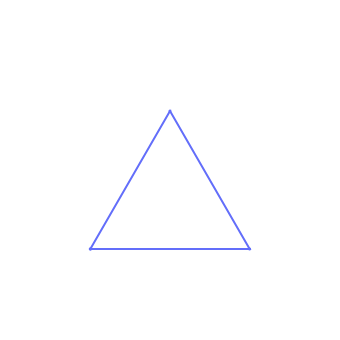

In [22]:
figure(
    data = scatter(
        x = [0, 1, 0.5, 0], 
        y = [0, 0, sqrt(3)/2, 0],
        mode = "lines+markers",
        marker = {"size": 3},
    ),
    layout = {
        "template": "plotly_white",
        "xaxis": {"visible": False, "range": [0, 1]},
        "yaxis": {"visible": False, "scaleanchor": "x", "scaleratio": 1},
    },
)

In [159]:
go.Layout.yaxis?

### Fractal Triangle

In [23]:
import random
import plotly.graph_objects as go

from math import sqrt
from plotly.graph_objects import Figure as figure
from plotly.graph_objects import Scatter as scatter

In [24]:
triangle = [(0,0), (1,0), (0.5, sqrt(3)/2)]

In [25]:
def draw(points):
    return figure(
        data = scatter(
            x = [x for x,y in points],
            y = [y for x,y in points],
            mode = "markers",
            marker = {"size": 3},
        ),
        layout = {
            "template": "plotly_white",
            "xaxis": {"visible": False, "range": [0, 1]},
            "yaxis": {"visible": False, "scaleanchor": "x", "scaleratio": 1},
        },
    )

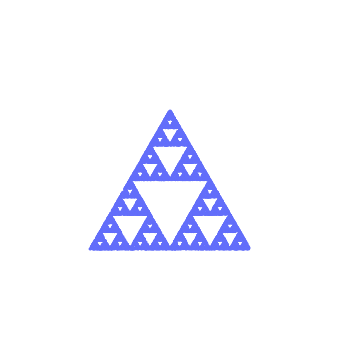

In [26]:
def middle(a, b):
    x = sum(x for x,y in [a,b])
    y = sum(y for x,y in [a,b])
    return (x/2, y/2)
    
def nextPoint(dot):
    selected = random.choice(triangle)
    return middle(dot, selected)

points = []
point = triangle[0]
for _ in range(10000):
    point = nextPoint(point)
    points.append(point)
    
draw(points)

In [27]:
def nextPoint(dot):
    p = random.random()
    x,y = dot
    if p < 0.40:
        return (0.31*x - 0.53*y + 0.89, -0.46*x - 0.29*y + 1.10)
    if p < 0.40 + 0.15:
        return (0.31*x - 0.08*y + 0.22, 0.15*x - 0.45*y + 0.34)
    return (0.55*y + 0.01, 0.69*x - 0.20*y + 0.38)

def fractal(getNextPoint = nextPoint, trials = 10000):
    points = []
    point = (0,0)
    for _ in range(trials):
        point = getNextPoint(point)
        points.append(point)    
    graph = draw(points)
    graph.show()

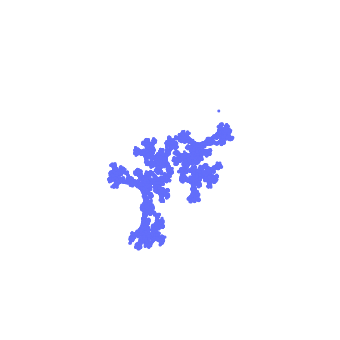

In [28]:
fractal()

In [29]:
def fern(dot):
    p = random.random()
    x,y = dot
    if p < 0.02:
        return (0.5, 0.27*y)
    if p < 0.02 + 0.15:
        return (-0.14*x + 0.26*y + 0.57, 0.25*x + 0.22*y - 0.04)
    if p < 0.02 + 0.15 + 0.13:
        return (0.17*x - 0.21*y + 0.41, 0.22*x + 0.18*y + 0.09)      
    return (0.78*x + 0.03*y + 0.11, -0.03*x + 0.74*y + 0.27)


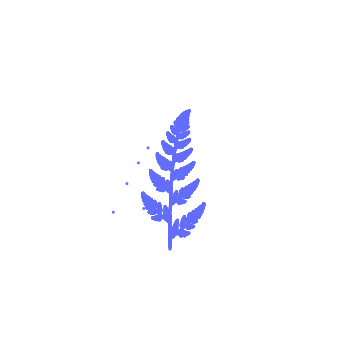

In [30]:
fractal(fern)